<a href="https://colab.research.google.com/github/VaishnaviMudaliar/deep-learning/blob/main/Time_Series_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series **


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_tesla = pd.read_csv('/content/TSLA.csv')

df_tesla['Date'] = pd.to_datetime(df_tesla['Date'])
df_tesla.set_index('Date',inplace = True)



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


Simple Moving Average

<Axes: xlabel='Date'>

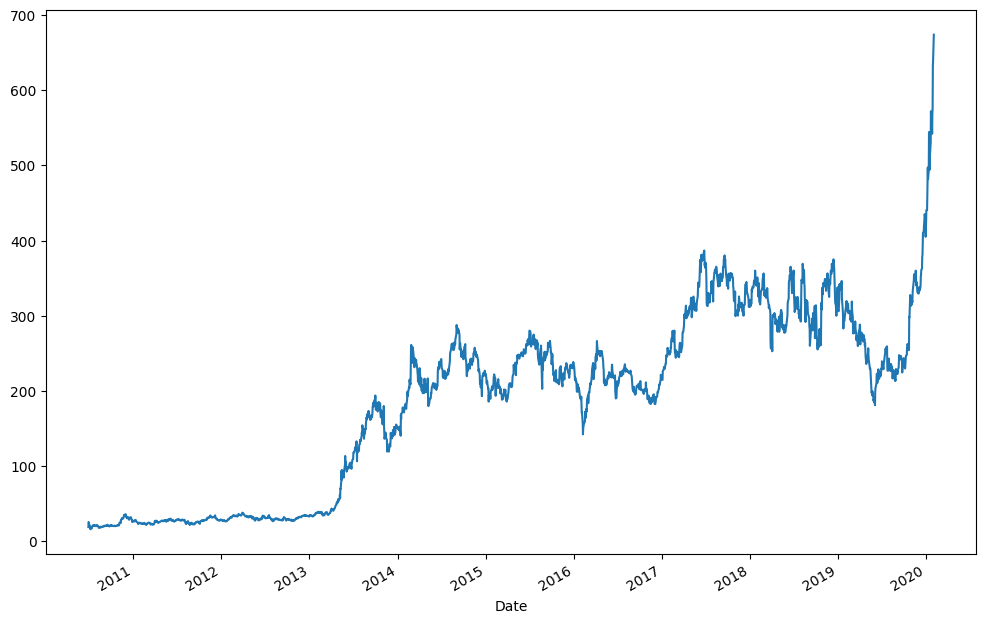

In [9]:
df_tesla['Open'].plot(figsize = (12,8))

<Axes: xlabel='Date'>

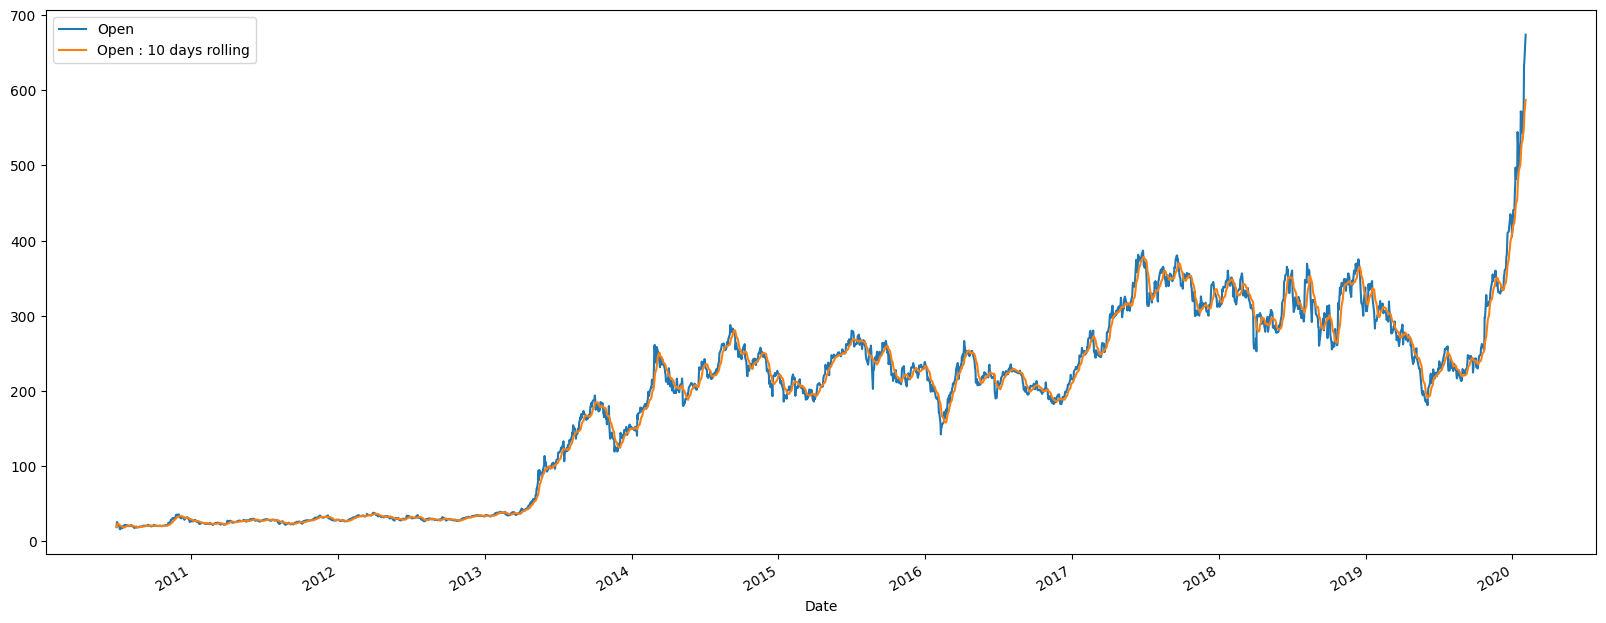

In [12]:
df_tesla['Open : 10 days rolling'] = df_tesla['Open'].rolling(window = 10 , min_periods = 1).mean()
df_tesla[['Open','Open : 10 days rolling']].plot(figsize = (20,8))

<Axes: xlabel='Date'>

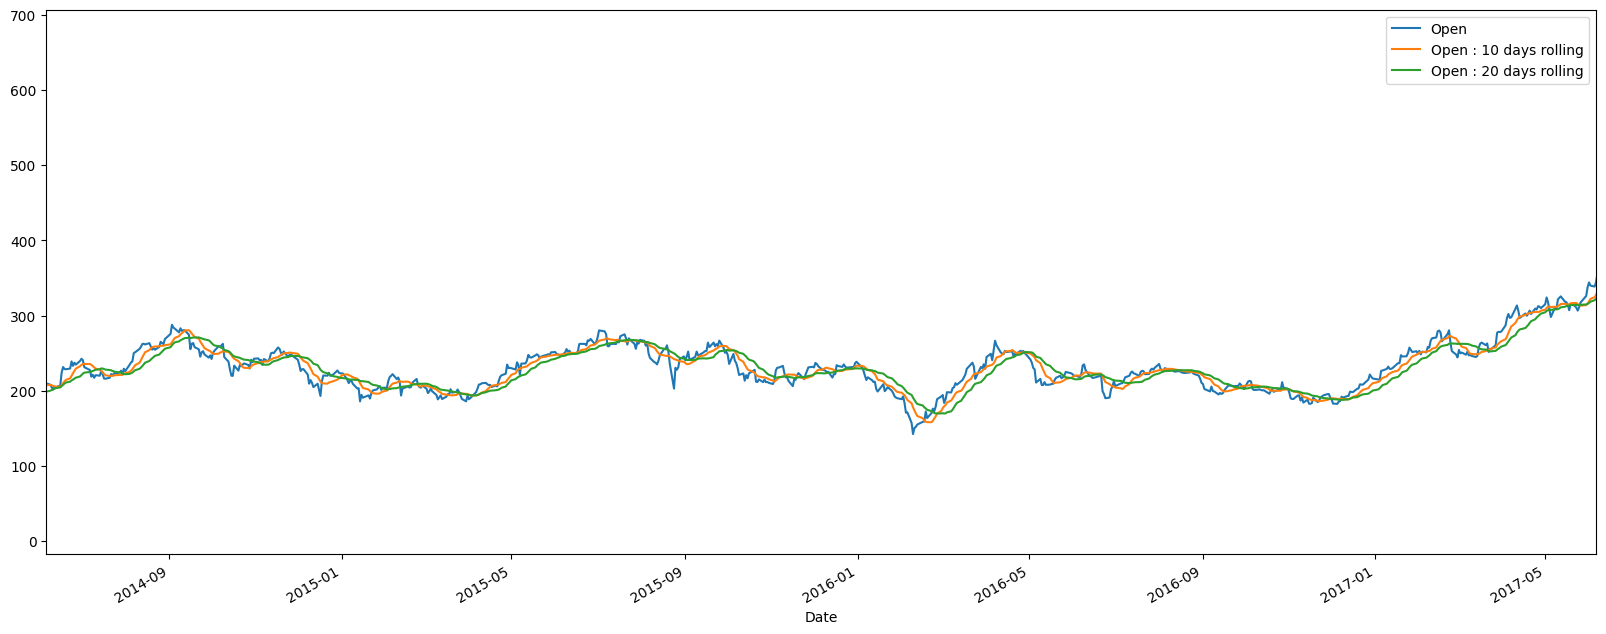

In [15]:
df_tesla['Open : 20 days rolling'] = df_tesla['Open'].rolling(window = 20 , min_periods = 1).mean()
df_tesla[['Open','Open : 10 days rolling','Open : 20 days rolling']].plot(figsize = (20,8),xlim = ['2014-06-06','2017-06-06'])

##**Cumulative moving average**

## Expanding

<Axes: xlabel='Date'>

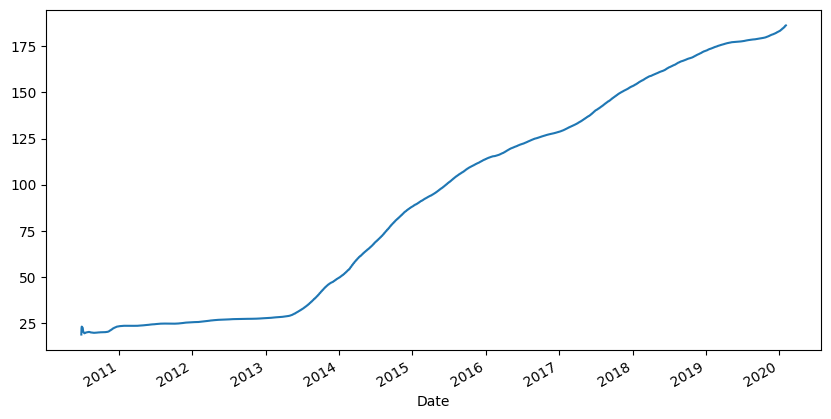

In [16]:
df_tesla['Open'].expanding().mean().plot(figsize = (10,5))

## Exponential  moving average

### FORMULA
((CLOSE - PREV EMA)*MLTIPLIER)+ PREV EMA

### MULTIPLIER = (2/WINDOW_SIZE)+1

In [17]:
df_tesla['EMA'] = df_tesla['Open'].ewm(alpha = 0.1 , adjust = False).mean()

<Axes: xlabel='Date'>

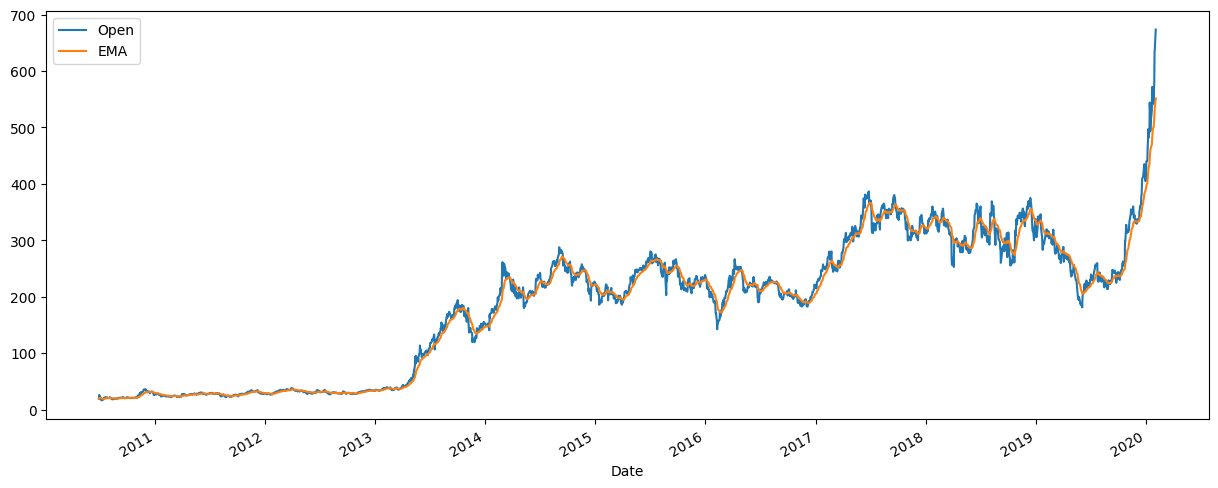

In [18]:
df_tesla[['Open','EMA']].plot(figsize= (15,6))

##EXPONENTIAL WEIGHTED MOVING AVERAGE
EMWA(T) = A * X(T) + (1-A)EMWA(T-1)

A: WEIGHT

In [20]:
df_tesla['EWMA'] = df_tesla['Open'].ewm(span = 5 , adjust = False).mean()

<Axes: xlabel='Date'>

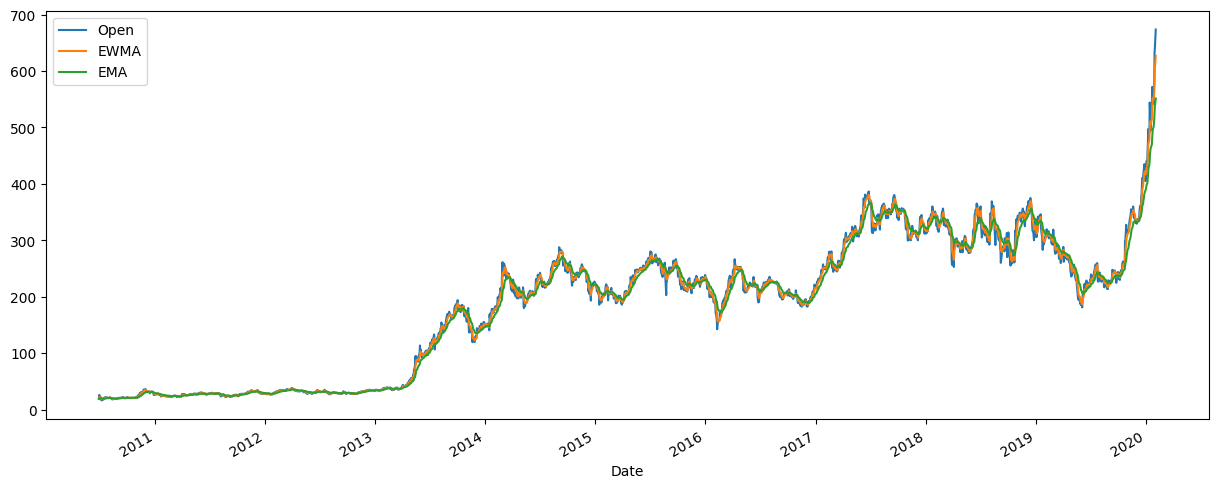

In [22]:
df_tesla[['Open','EWMA','EMA']].plot(figsize= (15,6))